In [9]:
# %pip install scikit-learn
# https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/blob/master/LinearRegression/Kaggle/House%20Price%20Prediction%20(Andrew%20Ng).ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
#loading the train and test data
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
y_train=df_train.iloc[:,-1].values
df_train.drop(["SalePrice"],axis=1,inplace=True)
df=pd.concat([df_train,df_test])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [6]:
# Removing features with > 50% missing values
missing=df.isnull().sum()/len(df)
miss_features=missing.loc[missing>0.5].index
df.drop(miss_features,inplace=True,axis=1)

In [7]:
df_train.corr()

ValueError: could not convert string to float: 'RL'

In [6]:
# removing features that has <+-0.3 correlation coefficient from SalePrice
df.drop(["Id","YrSold","MoSold","MiscVal","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch","KitchenAbvGr",
         "BedroomAbvGr", "HalfBath","BsmtFullBath","BsmtHalfBath","LowQualFinSF","BsmtUnfSF","BsmtFinSF2","MSSubClass",
         "OverallCond", "LotArea"],inplace=True,axis=1)

In [7]:
# fillna
for bsmt in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]:
    df[bsmt].fillna("No",inplace=True)



df["FireplaceQu"].fillna("No",inplace=True)

for gar in ('GarageType', 'GarageFinish', 'GarageQual',"GarageYrBlt","GarageCond"):
    df[gar].fillna('No',inplace=True)
    
for gar1 in ('GarageCars', 'GarageArea'):
    df[gar1].fillna(0,inplace=True)

for ea in ("LotFrontage","MasVnrArea","TotalBsmtSF","BsmtFinSF1"):
    df[ea].fillna(df[ea].mean(),inplace=True)

for _ in ("MasVnrType","MSZoning","Utilities","Exterior1st","Exterior2nd","Functional","KitchenQual","SaleType","Electrical"):
    df[_].fillna(df[_].mode()[0],inplace=True)

In [8]:
# encoding categorical features
df=pd.get_dummies(df,columns=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope",
                              "Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl",
                              "Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual",
                              "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir",
                              "Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageYrBlt","GarageFinish",
                              "GarageQual","GarageCond","PavedDrive","SaleType","SaleCondition"],
                  prefix=["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood",
                          "Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd",
                          "MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                          "BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional",
                          "FireplaceQu","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PavedDrive",
                          "SaleType","SaleCondition"],drop_first=True)

In [9]:
# Convert dataframe into X and y numpy array
X_train=df.iloc[:1460,:].values

X_test=df.iloc[1460:,:].values

In [10]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)

In [11]:
# add columns of ones to X
m,n=X_train.shape[0],X_train.shape[1]
X_train = np.append(np.ones((m,1)),X_train,axis=1)
theta=np.zeros((n+1,1))

In [12]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [13]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [14]:
# Run gradient descent
theta, J_history = gradientDescent(X_train,y_train.reshape(m,1),theta,0.01,400)

Text(0.5,1,'Cost function using Gradient Descent')

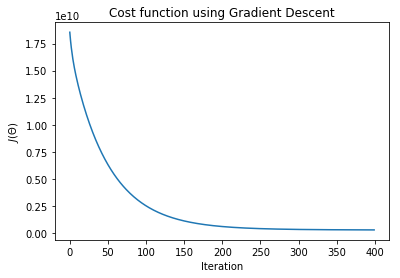

In [15]:
# visualize the cost function
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [16]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(x,theta)
    
    return predictions

In [17]:
#feature normalisation of X_test values
X_test= sc_X.fit_transform(X_test)
X_test=np.append(np.ones((X_test.shape[0],1)),X_test,axis=1)
predict=predict(X_test,theta)

In [18]:
# export as csv
np.savetxt("submission.csv",predict,fmt="%.1f")